# ETL - Base de Datos de Empresas Activas
## Camara de Comercio de Ibague - Corte a 31 de Diciembre de 2025

**Autor:** Juan Camilo Perea Possos  
**Fecha:** 20 de Febrero de 2026  

---

### Descripcion del proyecto

Este notebook realiza un proceso completo de **ETL (Extract, Transform, Load)** sobre la base de datos publica de empresas y/o entidades activas registradas en la jurisdiccion de la Camara de Comercio de Ibague, con corte al 31 de diciembre de 2025.

El proceso ETL se compone de tres fases fundamentales:

1. **Extract (Extraccion):** Carga de los datos crudos desde el archivo CSV original.
2. **Transform (Transformacion):** Limpieza, estandarizacion, conversion de tipos de datos, tratamiento de valores faltantes, analisis de correlacion y seleccion de variables relevantes.
3. **Load (Carga):** Exportacion de los datos limpios y transformados a un nuevo archivo CSV.

Adicionalmente, se incluye un **Analisis Exploratorio de Datos (EDA)** con visualizaciones que permiten comprender la estructura y distribucion de la informacion empresarial de la region.

---
## Paso 1: Importacion de Librerias

En este primer paso se importan todas las librerias necesarias para el desarrollo del ETL y el analisis exploratorio. Cada libreria cumple un rol especifico:

- **pandas:** Manipulacion y analisis de datos tabulares (DataFrames).
- **numpy:** Operaciones numericas y manejo de valores nulos (NaN).
- **matplotlib:** Creacion de graficos y visualizaciones estaticas.
- **seaborn:** Visualizaciones estadisticas de alto nivel, construida sobre matplotlib.
- **wordcloud:** Generacion de nubes de palabras a partir de texto.
- **warnings:** Supresion de advertencias menores para mantener el notebook limpio.

In [1]:
# ============================================================
# PASO 1: IMPORTACION DE LIBRERIAS
# ============================================================

# pandas: libreria principal para manipulacion de datos en formato tabular (filas y columnas)
import pandas as pd

# numpy: libreria para operaciones numericas y manejo de valores especiales como NaN
import numpy as np

# matplotlib.pyplot: motor de graficacion para crear visualizaciones estaticas
import matplotlib.pyplot as plt

# seaborn: libreria de visualizacion estadistica que extiende matplotlib con graficos mas elegantes
import seaborn as sns

# WordCloud: clase para generar nubes de palabras a partir de frecuencias de texto
from wordcloud import WordCloud

# warnings: modulo para controlar la visualizacion de advertencias del sistema
import warnings

# Suprimir advertencias menores que no afectan el resultado pero ensucian la salida
warnings.filterwarnings('ignore')

# Configurar el estilo visual de seaborn para que los graficos tengan un fondo con cuadricula
sns.set_style('whitegrid')

# Configurar matplotlib para que los graficos se muestren directamente en el notebook
%matplotlib inline

print('Librerias importadas correctamente.')

Librerias importadas correctamente.


---
## Paso 2: Extraccion de Datos (Extract)

La fase de **extraccion** consiste en leer los datos desde su fuente original. En este caso, el archivo CSV contiene 20,280 registros de empresas y entidades activas.

Se utiliza `pd.read_csv()` especificando:
- La ruta del archivo fuente.
- La codificacion `utf-8` para manejar correctamente caracteres especiales (tildes, enes).
- El separador de columnas (coma por defecto en CSV).

Tras la carga, se realiza una inspeccion inicial para verificar que los datos se leyeron correctamente.

In [2]:
# ============================================================
# PASO 2: EXTRACCION DE DATOS (EXTRACT)
# ============================================================

# Definir la ruta al archivo CSV original
# Se usa raw string (r"") para evitar problemas con las barras invertidas en Windows
ruta_archivo = r'data/BASE_DE_DATOS_DE_EMPRESAS_Y_O_ENTIDADES_ACTIVAS_-_JURISDICCIÓN_CÁMARA_DE_COMERCIO_DE_IBAGUÉ_-_CORTE_A_31_DE_DICIEMBRE_DE_2025_20260207.csv'

# Leer el archivo CSV y cargarlo en un DataFrame de pandas
# encoding='utf-8': asegura la correcta lectura de caracteres especiales (tildes, ñ)
# sep=',': indica que las columnas estan separadas por comas
df = pd.read_csv(ruta_archivo, encoding='utf-8', sep=',')

# Mostrar las dimensiones del DataFrame (filas, columnas)
print(f'Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas')
print(f'Total de registros cargados: {df.shape[0]:,}')
print(f'Total de variables (columnas): {df.shape[1]}')

Dimensiones del dataset: 20280 filas x 85 columnas
Total de registros cargados: 20,280
Total de variables (columnas): 85


In [3]:
# Mostrar las primeras 5 filas para verificar que la carga fue correcta
# .head() devuelve las primeras n filas del DataFrame (por defecto 5)
print('--- Primeras 5 filas del dataset ---')
df.head()

--- Primeras 5 filas del dataset ---


,MATRICULA,PROPONENTE,ORGANIZACION,CATEGORIA,ESTADO DE LA MATRICULA,RAZON SOCIAL,EMPRENDIMIENTO SOCIAL,NIT,NACIONALIDAD,FECHA DE MATRICULA,...,FECHA DE PAGO DE RENOVACION 2020,FECHA DE PAGO DE RENOVACION 2021,FECHA DE PAGO DE RENOVACION 2022,FECHA DE PAGO DE RENOVACION 2023,FECHA DE PAGO DE RENOVACION 2024,FECHA DE PAGO DE RENOVACION 2025,NUMERO DE SOCIOS,REPRESENTANTE LEGAL SUPLENTE,REPRESENTANTE LEGAL,FECHA DE LA INFORMACION
0,S0507787,No aplica,ESAL,PRINCIPAL,IA,FUNDACION MISIONERA VOLVIENDO A CASA,N,No aplica,No aplica,20251230.0,...,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,0.0,No reporta,No reporta,2025 Dec 31 12:00:00 AM
1,S0507786,No aplica,ESAL,PRINCIPAL,IA,ASOCIACION DE EXTENSIONISTAS DEL TOLIMA,N,No aplica,No aplica,20251230.0,...,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,0.0,No reporta,No reporta,2025 Dec 31 12:00:00 AM
2,S0507785,No aplica,ESAL,PRINCIPAL,IA,FUNDACION ANGOVA,S,No aplica,No aplica,20251226.0,...,No reporta,No reporta,No reporta,No reporta,No reporta,20251223,0.0,1024568269,No reporta,2025 Dec 31 12:00:00 AM
3,100,No aplica,PERSONA NATURAL,PRINCIPAL,MA,TOCORA QUINTERO ORLANDO,N,58181062,COLOMBIANA,19720114.0,...,20210331,20210331,20220323,20230601,20240208,20250329,0.0,No reporta,No reporta,2025 Dec 31 12:00:00 AM
4,S0507784,No aplica,ESAL,PRINCIPAL,IA,ASOCIACIÓN UNION CAMPESINA DEL TOLIMA,N,9020197540,No aplica,20251223.0,...,No reporta,No reporta,No reporta,No reporta,No reporta,20251223,0.0,1070953026,BEDOYA CASALLAS DUBAN ANDRES,2025 Dec 31 12:00:00 AM


In [4]:
# Listar todas las columnas del dataset para conocer las variables disponibles
# .columns devuelve un Index con los nombres de todas las columnas
print('--- Lista completa de columnas ---')
for i, col in enumerate(df.columns, 1):
    print(f'  {i:2d}. {col}')

--- Lista completa de columnas ---
   1. MATRICULA
   2. PROPONENTE
   3. ORGANIZACION
   4. CATEGORIA
   5. ESTADO DE LA MATRICULA
   6. RAZON SOCIAL
   7. EMPRENDIMIENTO SOCIAL
   8. NIT
   9. NACIONALIDAD
  10. FECHA DE MATRICULA
  11. FECHA RENOVACION
  12. ULTIMO AÑO RENOVADO
  13. FECHA CONSTITUCION
  14. FECHA DE VIGENCIA
  15. DIRECCION COMERCIAL
  16. BARRIO COMERCIAL
  17. MUNICIPIO COMERCIAL
  18. VIGILANCIA
  19. EMAIL COMERCIAL 1
  20. EMAIL COMERCIAL 2
  21. EMAIL COMERCIAL 3
  22. DIRECCION DE NOTIFICACION
  23. MUNICIPIO DE NOTIFICACION
  24. EMAIL DE NOTIFICACION
  25. CIIU-1
  26. CIIU-2
  27. CIIU-3
  28. CIIU-4
  29. ACTIVIDAD
  30. CANTIDAD DE MUJERES
  31. CANTIDAD DE MUJERES EN CARGOS DIRECTIVOS
  32. % DE PARTICIPACIÓN DE MUJERES
  33. CIIU TAMAÑO EMPRESARIAL
  34. AÑO DATOS TAMAÑO EMPRESARIAL
  35. FECHA DATOS TAMAÑO EMPRESARIAL
  36. TAMAÑO EMPRESA
  37. LIBROS DE COMERCIO
  38. CTR. EMBARGO
  39. IMPORTA / EXPORTA
  40. TIPO LOCAL SEDE ADMINISTRATIVA
  41. TI

---
## Paso 3: Exploracion Inicial del Dataset

Antes de transformar los datos, es fundamental comprender su estructura. En esta fase se analiza:

- **Tipos de datos** de cada columna (texto, numerico, fecha, etc.).
- **Valores unicos** por columna para entender la cardinalidad.
- **Estadisticas descriptivas** tanto para variables numericas como categoricas.
- **Valores especiales** como "No reporta" y "No aplica" que actuan como datos faltantes enmascarados.

Esta exploracion permite tomar decisiones informadas sobre que transformaciones aplicar en los siguientes pasos.

In [5]:
# ============================================================
# PASO 3: EXPLORACION INICIAL
# ============================================================

# .info() muestra el tipo de dato de cada columna, cantidad de valores no nulos
# y el uso de memoria del DataFrame
print('=== INFORMACION GENERAL DEL DATASET ===')
df.info()

=== INFORMACION GENERAL DEL DATASET ===
<class 'pandas.DataFrame'>
RangeIndex: 20280 entries, 0 to 20279
Data columns (total 85 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MATRICULA                                               20280 non-null  object 
 1   PROPONENTE                                              20275 non-null  str    
 2   ORGANIZACION                                            20275 non-null  str    
 3   CATEGORIA                                               20275 non-null  str    
 4   ESTADO DE LA MATRICULA                                  20275 non-null  str    
 5   RAZON SOCIAL                                            20275 non-null  str    
 6   EMPRENDIMIENTO SOCIAL                                   20275 non-null  str    
 7   NIT                                                     20275 non-null  str    
 8   NACIONA

In [6]:
# .describe() genera estadisticas descriptivas para las columnas numericas:
# count (conteo), mean (media), std (desviacion estandar), min, max y percentiles
print('=== ESTADISTICAS DESCRIPTIVAS - VARIABLES NUMERICAS ===')
df.describe()

=== ESTADISTICAS DESCRIPTIVAS - VARIABLES NUMERICAS ===


,FECHA DE MATRICULA,FECHA RENOVACION,ULTIMO AÑO RENOVADO,PERSONAL,PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL PRIVADO,PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL PUBLICO,PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL TOTAL,PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO PRIVADO,PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO PUBLICO\t,PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO TOTAL,NUMERO DE SOCIOS
count,2.027500e+04,2.027500e+04,20275.000000,2.027500e+04,20275.000000,20275.000000,20275.000000,20275.000000,20275.000000,20275.000000,20275.000000
mean,2.020056e+07,2.024940e+07,2024.876547,6.425530e+02,15.281619,0.098898,14.632306,0.037485,0.004932,0.036991,0.163650
std,1.086236e+05,6.422115e+03,0.677213,4.934794e+04,79.158213,3.102579,35.973293,1.839086,0.702295,1.813439,0.665643
min,1.971062e+07,1.988071e+07,1988.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.024100e+07,2.025023e+07,2025.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.025031e+07,2.025041e+07,2025.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.025072e+07,2.025073e+07,2025.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.025123e+07,2.025123e+07,2025.000000,5.000000e+06,10000.000000,100.000000,1000.000000,100.000000,100.000000,100.000000,16.000000


In [7]:
# .describe(include='object') genera estadisticas para columnas de texto:
# count (conteo), unique (valores unicos), top (valor mas frecuente), freq (frecuencia del top)
print('=== ESTADISTICAS DESCRIPTIVAS - VARIABLES CATEGORICAS ===')
df.describe(include='object')

=== ESTADISTICAS DESCRIPTIVAS - VARIABLES CATEGORICAS ===


,MATRICULA,PROPONENTE,ORGANIZACION,CATEGORIA,ESTADO DE LA MATRICULA,RAZON SOCIAL,EMPRENDIMIENTO SOCIAL,NIT,NACIONALIDAD,FECHA CONSTITUCION,...,FECHA DE PAGO DE RENOVACION 2019,FECHA DE PAGO DE RENOVACION 2020,FECHA DE PAGO DE RENOVACION 2021,FECHA DE PAGO DE RENOVACION 2022,FECHA DE PAGO DE RENOVACION 2023,FECHA DE PAGO DE RENOVACION 2024,FECHA DE PAGO DE RENOVACION 2025,REPRESENTANTE LEGAL SUPLENTE,REPRESENTANTE LEGAL,FECHA DE LA INFORMACION
count,20280,20275,20275,20275,20275,20275,20275,20275,20275,20275,...,20275,20275,20275,20275,20275,20275,20275,20275,20275,20275
unique,20280,389,13,3,2,20223,3,11127,22,1945,...,434,520,480,452,402,383,292,3518,2034,1
top,S0507787,No aplica,ESTABLECIMIENTO DE COMERCIO,PRINCIPAL,MA,GARCIA DE PEREZ MERCEDES,N,No aplica,No aplica,No aplica,...,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,No reporta,2025 Dec 31 12:00:00 AM
freq,1,19887,9001,20147,18295,2,10005,9146,12839,15533,...,16686,16628,16515,16412,16277,13720,2083,16584,18185,20275


In [8]:
# Contar cuantos valores "No reporta" y "No aplica" hay en cada columna
# Estos valores son datos faltantes enmascarados como texto
print('=== CONTEO DE VALORES ESPECIALES POR COLUMNA ===')
print()

# Iterar sobre cada columna del DataFrame
for col in df.columns:
    # Contar ocurrencias de "No reporta" en la columna actual
    no_reporta = (df[col] == 'No reporta').sum()
    # Contar ocurrencias de "No aplica" en la columna actual
    no_aplica = (df[col] == 'No aplica').sum()
    # Contar valores nulos reales (NaN)
    nulos = df[col].isna().sum()
    
    # Solo mostrar columnas que tengan al menos uno de estos valores
    if no_reporta > 0 or no_aplica > 0 or nulos > 0:
        print(f'{col}:')
        if no_reporta > 0:
            print(f'    "No reporta": {no_reporta:,} ({no_reporta/len(df)*100:.1f}%)')
        if no_aplica > 0:
            print(f'    "No aplica":  {no_aplica:,} ({no_aplica/len(df)*100:.1f}%)')
        if nulos > 0:
            print(f'    NaN (nulos):  {nulos:,} ({nulos/len(df)*100:.1f}%)')

=== CONTEO DE VALORES ESPECIALES POR COLUMNA ===

PROPONENTE:
    "No aplica":  19,887 (98.1%)
    NaN (nulos):  5 (0.0%)
ORGANIZACION:
    NaN (nulos):  5 (0.0%)
CATEGORIA:
    NaN (nulos):  5 (0.0%)
ESTADO DE LA MATRICULA:
    NaN (nulos):  5 (0.0%)
RAZON SOCIAL:
    NaN (nulos):  5 (0.0%)
EMPRENDIMIENTO SOCIAL:
    "No aplica":  9,200 (45.4%)
    NaN (nulos):  5 (0.0%)
NIT:
    "No aplica":  9,146 (45.1%)
    NaN (nulos):  5 (0.0%)
NACIONALIDAD:
    "No aplica":  12,839 (63.3%)
    NaN (nulos):  5 (0.0%)
FECHA DE MATRICULA:
    NaN (nulos):  5 (0.0%)
FECHA RENOVACION:
    NaN (nulos):  5 (0.0%)
ULTIMO AÑO RENOVADO:
    NaN (nulos):  5 (0.0%)
FECHA CONSTITUCION:
    "No aplica":  15,533 (76.6%)
    NaN (nulos):  5 (0.0%)
FECHA DE VIGENCIA:
    "No aplica":  16,610 (81.9%)
    NaN (nulos):  5 (0.0%)
DIRECCION COMERCIAL:
    NaN (nulos):  5 (0.0%)
BARRIO COMERCIAL:
    "No reporta": 313 (1.5%)
    NaN (nulos):  5 (0.0%)
MUNICIPIO COMERCIAL:
    NaN (nulos):  5 (0.0%)
VIGILANCIA:
    "N

In [9]:
# Verificar si existen filas duplicadas en el dataset
# .duplicated() retorna True para cada fila que es duplicada de otra anterior
duplicados = df.duplicated().sum()
print(f'Cantidad de filas duplicadas: {duplicados}')

# Verificar duplicados solo por la columna MATRICULA (identificador unico esperado)
duplicados_matricula = df['MATRICULA'].duplicated().sum()
print(f'Matriculas duplicadas: {duplicados_matricula}')

Cantidad de filas duplicadas: 0
Matriculas duplicadas: 0


---
## Paso 4: Transformacion - Limpieza de Datos (Transform)

La fase de **transformacion** es el nucleo del proceso ETL. Aqui se realizan las siguientes operaciones:

1. **Reemplazo de valores especiales:** Los valores "No reporta" y "No aplica" se convierten a `NaN` (Not a Number), que es el estandar de pandas para representar datos faltantes.
2. **Eliminacion de duplicados:** Se eliminan filas completamente duplicadas si existen.
3. **Conversion de tipos de datos:**
   - Columnas con fechas en formato `YYYYMMDD` se convierten al tipo `datetime`.
   - Columnas numericas almacenadas como texto se convierten a tipo numerico.
4. **Limpieza de texto:** Estandarizacion de mayusculas/minusculas y eliminacion de espacios extra.
5. **Eliminacion de columnas con exceso de datos faltantes:** Columnas con mas del 80% de valores nulos se consideran poco utiles.

In [10]:
# ============================================================
# PASO 4: TRANSFORMACION - LIMPIEZA DE DATOS
# ============================================================

# 4.1 - Crear una copia del DataFrame original para preservar los datos crudos
# Esto es una buena practica: siempre trabajar sobre una copia para poder comparar
df_limpio = df.copy()

print(f'Shape antes de limpieza: {df_limpio.shape}')
print()

Shape antes de limpieza: (20280, 85)



In [11]:
# 4.2 - Reemplazar valores especiales por NaN
# "No reporta" y "No aplica" no son datos reales sino indicadores de ausencia de informacion
# Al convertirlos a NaN, pandas puede manejarlos correctamente en calculos y filtros

# Lista de valores que representan datos faltantes enmascarados
valores_faltantes = ['No reporta', 'No aplica', 'no reporta', 'no aplica', 'NO REPORTA', 'NO APLICA']

# .replace() busca y reemplaza los valores especificados en todo el DataFrame
# np.nan es el valor estandar de "Not a Number" en numpy/pandas
df_limpio = df_limpio.replace(valores_faltantes, np.nan)

# Verificar el resultado: contar nulos totales despues del reemplazo
total_nulos = df_limpio.isna().sum().sum()
total_celdas = df_limpio.shape[0] * df_limpio.shape[1]
print(f'Total de celdas en el dataset: {total_celdas:,}')
print(f'Total de valores nulos (NaN) despues del reemplazo: {total_nulos:,}')
print(f'Porcentaje de datos faltantes: {total_nulos/total_celdas*100:.2f}%')

Total de celdas en el dataset: 1,723,800
Total de valores nulos (NaN) despues del reemplazo: 766,621
Porcentaje de datos faltantes: 44.47%


In [12]:
# 4.3 - Eliminar filas completamente duplicadas
# .drop_duplicates() elimina filas donde TODAS las columnas son identicas a otra fila
filas_antes = len(df_limpio)
df_limpio = df_limpio.drop_duplicates()
filas_despues = len(df_limpio)

print(f'Filas antes de eliminar duplicados: {filas_antes:,}')
print(f'Filas despues de eliminar duplicados: {filas_despues:,}')
print(f'Filas eliminadas: {filas_antes - filas_despues}')

Filas antes de eliminar duplicados: 20,280
Filas despues de eliminar duplicados: 20,280
Filas eliminadas: 0


In [13]:
# 4.4 - Conversion de columnas de fecha
# Las fechas estan almacenadas como texto en formato YYYYMMDD (ej: "20251230")
# Se convierten al tipo datetime de pandas para poder hacer operaciones temporales

# Definir las columnas que contienen fechas en formato YYYYMMDD
columnas_fecha = [
    'FECHA DE MATRICULA', 'FECHA RENOVACION', 'FECHA CONSTITUCION',
    'FECHA DE VIGENCIA', 'FECHA DATOS TAMAÑO EMPRESARIAL',
    'FECHA DE DATOS NIIF'
]

for col in columnas_fecha:
    if col in df_limpio.columns:
        # pd.to_datetime() convierte texto a tipo fecha
        # format='%Y%m%d': indica que el formato es AñoMesDia (ej: 20251230)
        # errors='coerce': si un valor no se puede convertir, lo pone como NaT (Not a Time)
        df_limpio[col] = pd.to_datetime(df_limpio[col], format='%Y%m%d', errors='coerce')
        print(f'Columna "{col}" convertida a datetime')

# Convertir tambien las columnas de fechas de pago de renovacion (2016-2025)
for anio in range(2016, 2026):
    col_pago = f'FECHA DE PAGO DE RENOVACION {anio}'
    if col_pago in df_limpio.columns:
        df_limpio[col_pago] = pd.to_datetime(df_limpio[col_pago], format='%Y%m%d', errors='coerce')

print(f'\nColumnas de pago de renovacion (2016-2025) convertidas a datetime')

Columna "FECHA DE MATRICULA" convertida a datetime
Columna "FECHA RENOVACION" convertida a datetime
Columna "FECHA CONSTITUCION" convertida a datetime
Columna "FECHA DE VIGENCIA" convertida a datetime
Columna "FECHA DATOS TAMAÑO EMPRESARIAL" convertida a datetime
Columna "FECHA DE DATOS NIIF" convertida a datetime

Columnas de pago de renovacion (2016-2025) convertidas a datetime


In [14]:
# 4.5 - Conversion de columnas numericas
# Algunas columnas que deberian ser numericas fueron leidas como texto
# Se convierten al tipo numerico correcto para poder hacer calculos

# Definir las columnas que deben ser numericas
columnas_numericas = [
    'CANTIDAD DE MUJERES', 'CANTIDAD DE MUJERES EN CARGOS DIRECTIVOS',
    '% DE PARTICIPACIÓN DE MUJERES', 'PERSONAL', 'NUMERO DE SOCIOS',
    'CANTIDAD DE ESTABLECIMIENTOS', 'CANTIDAD DE AGENCIAS /SUCURSALES',
    'PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL PRIVADO',
    'PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL PUBLICO',
    'PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL TOTAL',
    'PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO PRIVADO',
    'PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO PUBLICO\t',
    'PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO TOTAL'
]

for col in columnas_numericas:
    if col in df_limpio.columns:
        # pd.to_numeric() convierte valores a tipo numerico
        # errors='coerce': si un valor no es numerico, lo convierte a NaN
        df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')
        print(f'Columna "{col}" convertida a numerico')

Columna "CANTIDAD DE MUJERES" convertida a numerico
Columna "CANTIDAD DE MUJERES EN CARGOS DIRECTIVOS" convertida a numerico
Columna "% DE PARTICIPACIÓN DE MUJERES" convertida a numerico
Columna "PERSONAL" convertida a numerico
Columna "NUMERO DE SOCIOS" convertida a numerico
Columna "CANTIDAD DE ESTABLECIMIENTOS" convertida a numerico
Columna "CANTIDAD DE AGENCIAS /SUCURSALES" convertida a numerico
Columna "PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL PRIVADO" convertida a numerico
Columna "PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL PUBLICO" convertida a numerico
Columna "PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL TOTAL" convertida a numerico
Columna "PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO PRIVADO" convertida a numerico
Columna "PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO PUBLICO	" convertida a numerico
Columna "PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO TOTAL" convertida a numerico


In [15]:
# 4.6 - Limpieza de columnas de texto
# Se estandarizan las columnas de texto: eliminar espacios extra y convertir a mayusculas
# Esto evita duplicados por diferencias de formato (ej: "Ibague" vs "IBAGUE" vs " ibague ")

# Seleccionar solo las columnas de tipo objeto (texto)
columnas_texto = df_limpio.select_dtypes(include='object').columns

for col in columnas_texto:
    # .str.strip(): elimina espacios en blanco al inicio y final del texto
    # .str.upper(): convierte todo el texto a mayusculas para uniformidad
    df_limpio[col] = df_limpio[col].str.strip().str.upper()

print(f'Se limpiaron {len(columnas_texto)} columnas de texto (espacios y mayusculas)')

Se limpiaron 55 columnas de texto (espacios y mayusculas)


In [16]:
# 4.7 - Identificar y eliminar columnas con exceso de valores faltantes
# Columnas con mas del 80% de datos faltantes aportan poca informacion util

# Calcular el porcentaje de nulos por columna
porcentaje_nulos = (df_limpio.isna().sum() / len(df_limpio) * 100).sort_values(ascending=False)

# Filtrar columnas con mas del 80% de valores nulos
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > 80].index.tolist()

print(f'Columnas con mas del 80% de valores nulos ({len(columnas_a_eliminar)}):') 
print()
for col in columnas_a_eliminar:
    print(f'  - {col}: {porcentaje_nulos[col]:.1f}% nulos')

# Eliminar esas columnas del DataFrame
# axis=1 indica que se eliminan columnas (no filas)
df_limpio = df_limpio.drop(columns=columnas_a_eliminar)

print(f'\nColumnas eliminadas: {len(columnas_a_eliminar)}')
print(f'Shape despues de eliminar columnas con exceso de nulos: {df_limpio.shape}')

Columnas con mas del 80% de valores nulos (27):

  - EMAIL COMERCIAL 3: 100.0% nulos
  - EMAIL COMERCIAL 2: 100.0% nulos
  - CANTIDAD DE AGENCIAS /SUCURSALES: 100.0% nulos
  - IMPORTA / EXPORTA: 99.7% nulos
  - CLASE DE ECONOMIA SOLIDARIA: 99.4% nulos
  - TIEMPO FUNCIONAMIENTO: 99.4% nulos
  - PROPONENTE: 98.1% nulos
  - FECHA DE VIGENCIA: 94.5% nulos
  - BIC - LEY 1901 DE 2018: 93.7% nulos
  - LIBROS DE COMERCIO: 92.9% nulos
  - CLASE GENERAL DE ESADL: 92.2% nulos
  - CIIU-4: 91.8% nulos
  - VIGILANCIA: 90.4% nulos
  - CLASE ESPECIAL ESADL: 90.2% nulos
  - REPRESENTANTE LEGAL: 89.7% nulos
  - TIPO DE PROPIETARIO: 88.8% nulos
  - CIIU-3: 83.6% nulos
  - FECHA DE PAGO DE RENOVACION 2016: 83.5% nulos
  - FECHA DE PAGO DE RENOVACION 2017: 82.8% nulos
  - FECHA DE PAGO DE RENOVACION 2018: 82.6% nulos
  - FECHA DE PAGO DE RENOVACION 2019: 82.3% nulos
  - RENUNCIA BENEFICIOS LEY 1780: 82.2% nulos
  - FECHA DE PAGO DE RENOVACION 2020: 82.0% nulos
  - REPRESENTANTE LEGAL SUPLENTE: 81.8% nulos


In [17]:
# 4.8 - Resumen del estado de los datos despues de la limpieza
print('=== RESUMEN POST-LIMPIEZA ===')
print(f'Filas: {df_limpio.shape[0]:,}')
print(f'Columnas: {df_limpio.shape[1]}')
print(f'Valores nulos restantes: {df_limpio.isna().sum().sum():,}')
print()
print('Tipos de datos:')
print(df_limpio.dtypes.value_counts())
print()
print('Columnas restantes:')
for i, col in enumerate(df_limpio.columns, 1):
    print(f'  {i:2d}. {col} ({df_limpio[col].dtype})')

=== RESUMEN POST-LIMPIEZA ===
Filas: 20,280
Columnas: 58
Valores nulos restantes: 297,803

Tipos de datos:
str               36
float64           13
datetime64[us]     7
object             2
Name: count, dtype: int64

Columnas restantes:
   1. MATRICULA (object)
   2. ORGANIZACION (str)
   3. CATEGORIA (str)
   4. ESTADO DE LA MATRICULA (str)
   5. RAZON SOCIAL (str)
   6. EMPRENDIMIENTO SOCIAL (str)
   7. NIT (str)
   8. NACIONALIDAD (str)
   9. FECHA DE MATRICULA (datetime64[us])
  10. FECHA RENOVACION (datetime64[us])
  11. ULTIMO AÑO RENOVADO (float64)
  12. FECHA CONSTITUCION (datetime64[us])
  13. DIRECCION COMERCIAL (str)
  14. BARRIO COMERCIAL (str)
  15. MUNICIPIO COMERCIAL (str)
  16. EMAIL COMERCIAL 1 (str)
  17. DIRECCION DE NOTIFICACION (str)
  18. MUNICIPIO DE NOTIFICACION (str)
  19. EMAIL DE NOTIFICACION (str)
  20. CIIU-1 (str)
  21. CIIU-2 (str)
  22. ACTIVIDAD (str)
  23. CANTIDAD DE MUJERES (float64)
  24. CANTIDAD DE MUJERES EN CARGOS DIRECTIVOS (float64)
  25. % D

---
## Paso 5: Analisis de Correlacion y Seleccion de Variables

El **analisis de correlacion** permite identificar relaciones lineales entre variables numericas. Se utiliza el coeficiente de **correlacion de Pearson**, que varia entre -1 y 1:

- **+1:** Correlacion positiva perfecta (cuando una variable sube, la otra tambien).
- **0:** No hay correlacion lineal.
- **-1:** Correlacion negativa perfecta (cuando una sube, la otra baja).

Este analisis es util para:
- Detectar **variables redundantes** (correlacion muy alta entre si, cercana a 1 o -1).
- Identificar **variables que no aportan variabilidad** (correlacion de 0 con todas las demas).
- Tomar decisiones informadas sobre que columnas conservar o eliminar.

In [18]:
# ============================================================
# PASO 5: ANALISIS DE CORRELACION
# ============================================================

# 5.1 - Seleccionar solo las columnas numericas del DataFrame
# .select_dtypes(include='number') filtra columnas de tipo int, float, etc.
df_numerico = df_limpio.select_dtypes(include='number')

print(f'Variables numericas disponibles: {df_numerico.shape[1]}')
print()
for i, col in enumerate(df_numerico.columns, 1):
    # Mostrar cada variable numerica con su conteo de valores no nulos
    no_nulos = df_numerico[col].notna().sum()
    print(f'  {i}. {col} ({no_nulos:,} valores validos)')

Variables numericas disponibles: 13

  1. ULTIMO AÑO RENOVADO (20,275 valores validos)
  2. CANTIDAD DE MUJERES (20,264 valores validos)
  3. CANTIDAD DE MUJERES EN CARGOS DIRECTIVOS (20,264 valores validos)
  4. % DE PARTICIPACIÓN DE MUJERES (20,264 valores validos)
  5. PERSONAL (20,275 valores validos)
  6. CANTIDAD DE ESTABLECIMIENTOS (8,598 valores validos)
  7. PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL PRIVADO (20,275 valores validos)
  8. PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL PUBLICO (20,275 valores validos)
  9. PORCENTAJE COMPOSICION DEL CAPITAL NACIONAL TOTAL (20,275 valores validos)
  10. PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO PRIVADO (20,275 valores validos)
  11. PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO PUBLICO	 (20,275 valores validos)
  12. PORCENTAJE COMPOSICION DEL CAPITAL EXTRANJERO TOTAL (20,275 valores validos)
  13. NUMERO DE SOCIOS (20,275 valores validos)


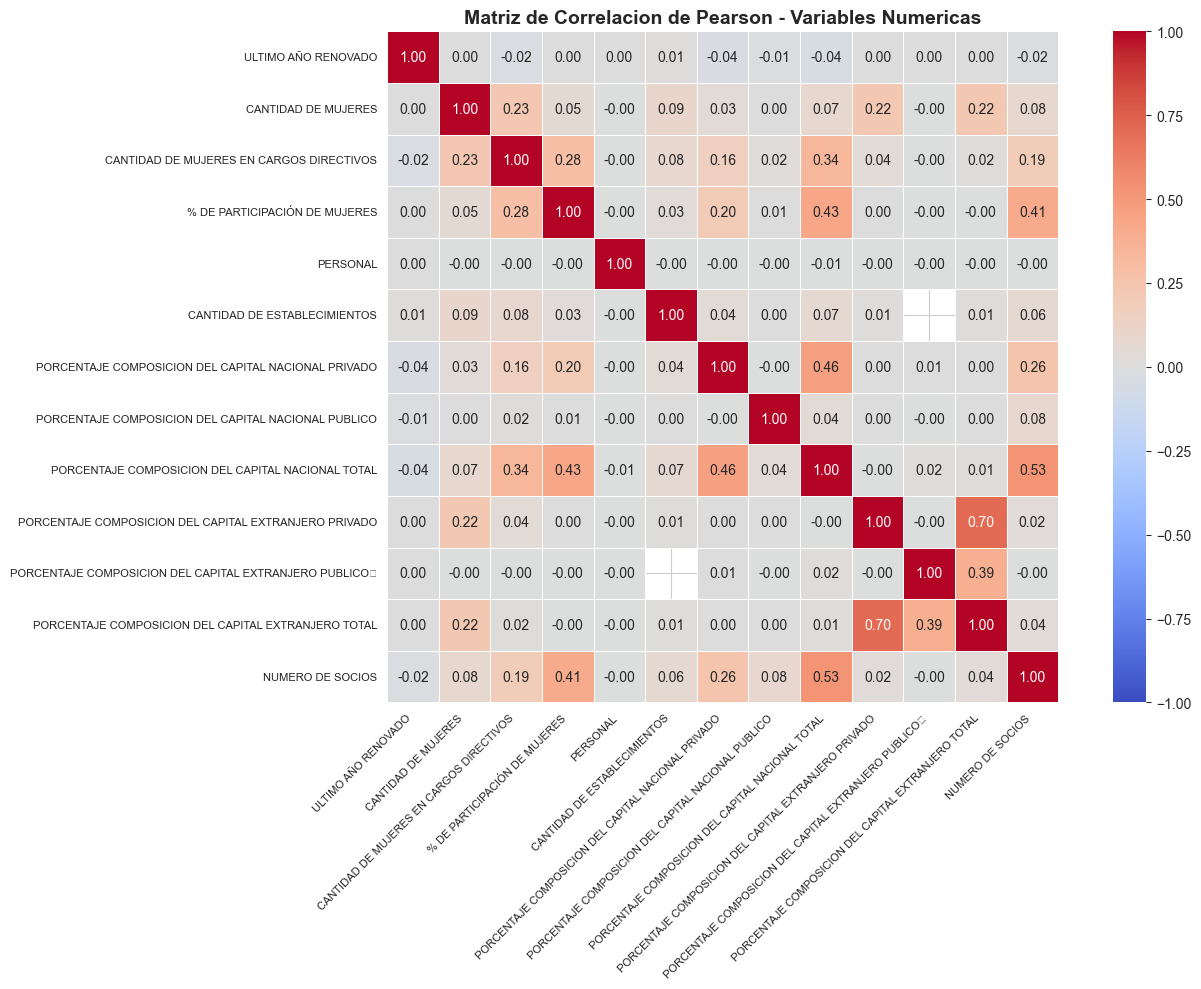


Interpretacion: valores cercanos a 1 o -1 indican correlacion fuerte.
Variables con correlacion > 0.9 entre si son candidatas a eliminacion por redundancia.


In [19]:
# 5.2 - Calcular la matriz de correlacion de Pearson
# .corr() calcula la correlacion entre todos los pares de columnas numericas
# El resultado es una matriz simetrica donde el valor [i,j] es la correlacion entre col_i y col_j
matriz_correlacion = df_numerico.corr()

# Crear un mapa de calor (heatmap) para visualizar la correlacion
# Los colores mas intensos indican correlaciones mas fuertes
plt.figure(figsize=(14, 10))

# sns.heatmap() dibuja una matriz coloreada segun los valores
# annot=True: muestra los valores numericos en cada celda
# fmt='.2f': formato de 2 decimales para los numeros
# cmap='coolwarm': paleta de colores azul (negativo) a rojo (positivo)
# center=0: el color neutro se centra en correlacion 0
# vmin/vmax: rango de la escala de colores
# linewidths: grosor de las lineas separadoras entre celdas
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    square=True
)

plt.title('Matriz de Correlacion de Pearson - Variables Numericas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

print('\nInterpretacion: valores cercanos a 1 o -1 indican correlacion fuerte.')
print('Variables con correlacion > 0.9 entre si son candidatas a eliminacion por redundancia.')

In [20]:
# 5.3 - Identificar pares de variables altamente correlacionadas
# Se buscan pares con correlacion absoluta > 0.85 (excluyendo la diagonal)

# Obtener la parte triangular superior de la matriz para evitar pares duplicados
# np.triu crea una mascara triangular superior
# k=1 excluye la diagonal principal (correlacion de una variable consigo misma = 1)
mascara_superior = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)

# Aplicar la mascara y convertir a formato largo (cada fila es un par de variables)
# .stack() convierte la matriz en una serie con multi-indice
correlaciones_altas = (
    matriz_correlacion.where(mascara_superior)
    .stack()
    .reset_index()
)
correlaciones_altas.columns = ['Variable_1', 'Variable_2', 'Correlacion']

# Filtrar solo las correlaciones con valor absoluto mayor a 0.85
correlaciones_altas = correlaciones_altas[
    correlaciones_altas['Correlacion'].abs() > 0.85
].sort_values('Correlacion', ascending=False)

if len(correlaciones_altas) > 0:
    print('Pares de variables con correlacion > 0.85:')
    print()
    for _, row in correlaciones_altas.iterrows():
        print(f'  {row["Variable_1"]}  <->  {row["Variable_2"]}  =  {row["Correlacion"]:.3f}')
else:
    print('No se encontraron pares de variables con correlacion > 0.85')

No se encontraron pares de variables con correlacion > 0.85


In [21]:
# 5.4 - Eliminar variables redundantes basado en el analisis de correlacion
# Cuando dos variables tienen correlacion muy alta (>0.85), se elimina una de ellas
# Se conserva la que tiene un nombre mas descriptivo o mayor utilidad analitica

# Identificar columnas redundantes para eliminar
# Criterio: de cada par altamente correlacionado, eliminar la menos informativa
columnas_redundantes = set()

for _, row in correlaciones_altas.iterrows():
    var1, var2 = row['Variable_1'], row['Variable_2']
    # Si ambas son de porcentaje de capital, conservar el total y eliminar los parciales
    if 'TOTAL' in str(var2):
        columnas_redundantes.add(var1)
    elif 'TOTAL' in str(var1):
        columnas_redundantes.add(var2)
    else:
        # Por defecto, eliminar la segunda variable del par
        columnas_redundantes.add(var2)

# Eliminar las columnas redundantes si existen en el DataFrame
columnas_a_quitar = [col for col in columnas_redundantes if col in df_limpio.columns]

if columnas_a_quitar:
    df_limpio = df_limpio.drop(columns=columnas_a_quitar)
    print(f'Columnas eliminadas por redundancia ({len(columnas_a_quitar)}):') 
    for col in columnas_a_quitar:
        print(f'  - {col}')
else:
    print('No se eliminaron columnas por redundancia.')

print(f'\nShape final despues de seleccion de variables: {df_limpio.shape}')

No se eliminaron columnas por redundancia.

Shape final despues de seleccion de variables: (20280, 58)


---
## Paso 6: Transformaciones Adicionales

En este paso se realizan transformaciones que agregan valor analitico al dataset:

1. **Extraccion del codigo de municipio:** Se separa el codigo numerico del nombre del municipio para facilitar agrupaciones.
2. **Calculo de antiguedad de la empresa:** Se calcula cuantos anos lleva registrada cada empresa desde su fecha de matricula.
3. **Clasificacion del CIIU:** Se extrae el codigo de actividad economica principal para analisis sectorial.

In [22]:
# ============================================================
# PASO 6: TRANSFORMACIONES ADICIONALES
# ============================================================

# 6.1 - Extraer el nombre del municipio sin el codigo
# El formato original es "73001 - IBAGUE", se extrae solo "IBAGUE"

if 'MUNICIPIO COMERCIAL' in df_limpio.columns:
    # .str.split(' - '): divide el texto por el separador " - "
    # .str[-1]: toma la ultima parte (el nombre del municipio)
    # .str.strip(): elimina espacios sobrantes
    df_limpio['NOMBRE_MUNICIPIO'] = (
        df_limpio['MUNICIPIO COMERCIAL']
        .str.split(' - ')
        .str[-1]
        .str.strip()
    )
    print('Columna NOMBRE_MUNICIPIO creada exitosamente.')
    print(f'Municipios unicos: {df_limpio["NOMBRE_MUNICIPIO"].nunique()}')
    print()
    # Mostrar los 10 municipios con mas empresas
    print('Top 10 municipios por cantidad de empresas:')
    print(df_limpio['NOMBRE_MUNICIPIO'].value_counts().head(10))

Columna NOMBRE_MUNICIPIO creada exitosamente.
Municipios unicos: 1

Top 10 municipios por cantidad de empresas:
NOMBRE_MUNICIPIO
IBAGUE    20275
Name: count, dtype: int64


In [23]:
# 6.2 - Calcular la antiguedad de cada empresa (en anos)
# Se calcula como la diferencia entre la fecha de corte (31-dic-2025) y la fecha de matricula

if 'FECHA DE MATRICULA' in df_limpio.columns:
    # Definir la fecha de referencia (corte del dataset)
    fecha_corte = pd.Timestamp('2025-12-31')
    
    # Calcular la diferencia en dias y convertir a anos
    # .dt.days: extrae la cantidad de dias de la diferencia temporal
    # / 365.25: convierte dias a anos (considerando anos bisiestos)
    df_limpio['ANTIGUEDAD_ANOS'] = (
        (fecha_corte - df_limpio['FECHA DE MATRICULA']).dt.days / 365.25
    ).round(1)
    
    print('Columna ANTIGUEDAD_ANOS creada exitosamente.')
    print()
    print('Estadisticas de antiguedad (anos):')
    print(df_limpio['ANTIGUEDAD_ANOS'].describe())

Columna ANTIGUEDAD_ANOS creada exitosamente.

Estadisticas de antiguedad (anos):
count    20275.000000
mean         5.509125
std         10.892265
min          0.000000
25%          0.400000
50%          0.800000
75%          1.200000
max         54.500000
Name: ANTIGUEDAD_ANOS, dtype: float64


In [24]:
# 6.3 - Extraer el codigo CIIU principal (sector economico)
# El formato original es "S9499 ** Actividades de otras asociaciones n.c.p."
# Se extrae solo el codigo "S9499" para facilitar agrupaciones por sector

if 'CIIU-1' in df_limpio.columns:
    # .str.split(' '): divide por espacios
    # .str[0]: toma la primera parte (el codigo CIIU)
    df_limpio['CIIU_CODIGO'] = (
        df_limpio['CIIU-1']
        .str.split(' ')
        .str[0]
    )
    
    # Extraer la letra inicial del CIIU que indica la seccion economica
    # Ejemplo: S = Otras actividades de servicios, G = Comercio, C = Manufactura
    df_limpio['SECCION_ECONOMICA'] = df_limpio['CIIU_CODIGO'].str[0]
    
    print('Columnas CIIU_CODIGO y SECCION_ECONOMICA creadas exitosamente.')
    print()
    print('Top 10 secciones economicas:')
    print(df_limpio['SECCION_ECONOMICA'].value_counts().head(10))

Columnas CIIU_CODIGO y SECCION_ECONOMICA creadas exitosamente.

Top 10 secciones economicas:
SECCION_ECONOMICA
G    7578
I    3447
S    3115
C    1277
N     915
M     809
F     714
H     499
R     427
Q     334
Name: count, dtype: int64


---
## Paso 7: Analisis Exploratorio de Datos (EDA)

El **Analisis Exploratorio de Datos (EDA)** tiene como objetivo descubrir patrones, tendencias y anomalias en los datos mediante tecnicas visuales y estadisticas.

En esta seccion se presentan tres tipos de visualizaciones:

1. **Histogramas:** Permiten observar la distribucion de frecuencias de variables numericas.
2. **Nube de palabras:** Muestra visualmente las palabras mas frecuentes en los nombres de las empresas.
3. **Grafico de barras:** Presenta la distribucion de empresas por tipo de organizacion y tamano empresarial.

### 7.1 Histogramas

Un **histograma** es un grafico que representa la distribucion de frecuencias de una variable numerica continua. El eje X muestra los rangos de valores (bins) y el eje Y muestra cuantos registros caen en cada rango.

Se generan histogramas para:
- **Antiguedad de las empresas:** Para ver cuantas empresas son nuevas vs. antiguas.
- **Cantidad de mujeres en las empresas:** Para analizar la participacion femenina.
- **Numero de socios:** Para entender la estructura societaria.

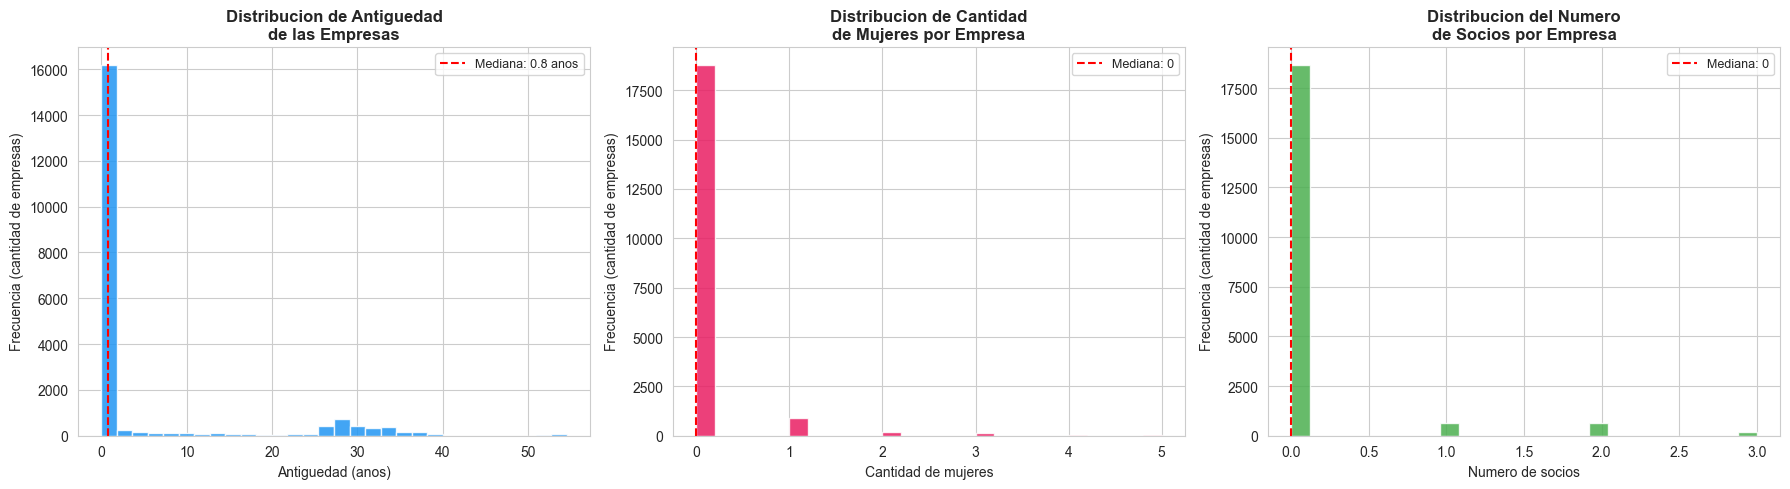


Interpretacion: Los histogramas muestran la distribucion de frecuencias.
Las lineas rojas punteadas indican la mediana de cada variable.


In [25]:
# ============================================================
# PASO 7.1: HISTOGRAMAS
# ============================================================

# Crear una figura con 3 subgraficos dispuestos en una fila
# figsize=(18, 5): ancho de 18 y alto de 5 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Histograma 1: Distribucion de la Antiguedad ---
if 'ANTIGUEDAD_ANOS' in df_limpio.columns:
    # .dropna(): elimina valores nulos antes de graficar
    datos_antiguedad = df_limpio['ANTIGUEDAD_ANOS'].dropna()
    
    # axes[0].hist(): dibuja el histograma en el primer subgrafico
    # bins=30: divide los datos en 30 intervalos
    # color: color de las barras
    # edgecolor: color del borde de las barras
    # alpha: transparencia (0=transparente, 1=opaco)
    axes[0].hist(datos_antiguedad, bins=30, color='#2196F3', edgecolor='white', alpha=0.85)
    axes[0].set_title('Distribucion de Antiguedad\nde las Empresas', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Antiguedad (anos)', fontsize=10)
    axes[0].set_ylabel('Frecuencia (cantidad de empresas)', fontsize=10)
    # Agregar linea vertical para la mediana
    mediana_ant = datos_antiguedad.median()
    axes[0].axvline(mediana_ant, color='red', linestyle='--', linewidth=1.5, label=f'Mediana: {mediana_ant:.1f} anos')
    axes[0].legend(fontsize=9)

# --- Histograma 2: Cantidad de Mujeres ---
if 'CANTIDAD DE MUJERES' in df_limpio.columns:
    datos_mujeres = df_limpio['CANTIDAD DE MUJERES'].dropna()
    # Filtrar valores extremos para mejor visualizacion (percentil 99)
    limite_superior = datos_mujeres.quantile(0.99)
    datos_mujeres_filtrado = datos_mujeres[datos_mujeres <= limite_superior]
    
    axes[1].hist(datos_mujeres_filtrado, bins=25, color='#E91E63', edgecolor='white', alpha=0.85)
    axes[1].set_title('Distribucion de Cantidad\nde Mujeres por Empresa', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Cantidad de mujeres', fontsize=10)
    axes[1].set_ylabel('Frecuencia (cantidad de empresas)', fontsize=10)
    mediana_muj = datos_mujeres_filtrado.median()
    axes[1].axvline(mediana_muj, color='red', linestyle='--', linewidth=1.5, label=f'Mediana: {mediana_muj:.0f}')
    axes[1].legend(fontsize=9)

# --- Histograma 3: Numero de Socios ---
if 'NUMERO DE SOCIOS' in df_limpio.columns:
    datos_socios = df_limpio['NUMERO DE SOCIOS'].dropna()
    # Filtrar valores extremos
    limite_socios = datos_socios.quantile(0.99)
    datos_socios_filtrado = datos_socios[datos_socios <= limite_socios]
    
    axes[2].hist(datos_socios_filtrado, bins=25, color='#4CAF50', edgecolor='white', alpha=0.85)
    axes[2].set_title('Distribucion del Numero\nde Socios por Empresa', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Numero de socios', fontsize=10)
    axes[2].set_ylabel('Frecuencia (cantidad de empresas)', fontsize=10)
    mediana_soc = datos_socios_filtrado.median()
    axes[2].axvline(mediana_soc, color='red', linestyle='--', linewidth=1.5, label=f'Mediana: {mediana_soc:.0f}')
    axes[2].legend(fontsize=9)

# Ajustar el espaciado entre subgraficos para evitar solapamiento
plt.tight_layout()
plt.show()

print('\nInterpretacion: Los histogramas muestran la distribucion de frecuencias.')
print('Las lineas rojas punteadas indican la mediana de cada variable.')

### 7.2 Nube de Palabras

Una **nube de palabras (Word Cloud)** es una representacion visual donde el tamano de cada palabra es proporcional a su frecuencia de aparicion en el texto analizado. Las palabras mas grandes son las que aparecen con mayor frecuencia.

Se genera una nube de palabras a partir de los **nombres de las empresas (RAZON SOCIAL)** para identificar:
- Sectores economicos predominantes en la region.
- Tipos de organizaciones mas comunes.
- Palabras clave que caracterizan el tejido empresarial de Ibague.

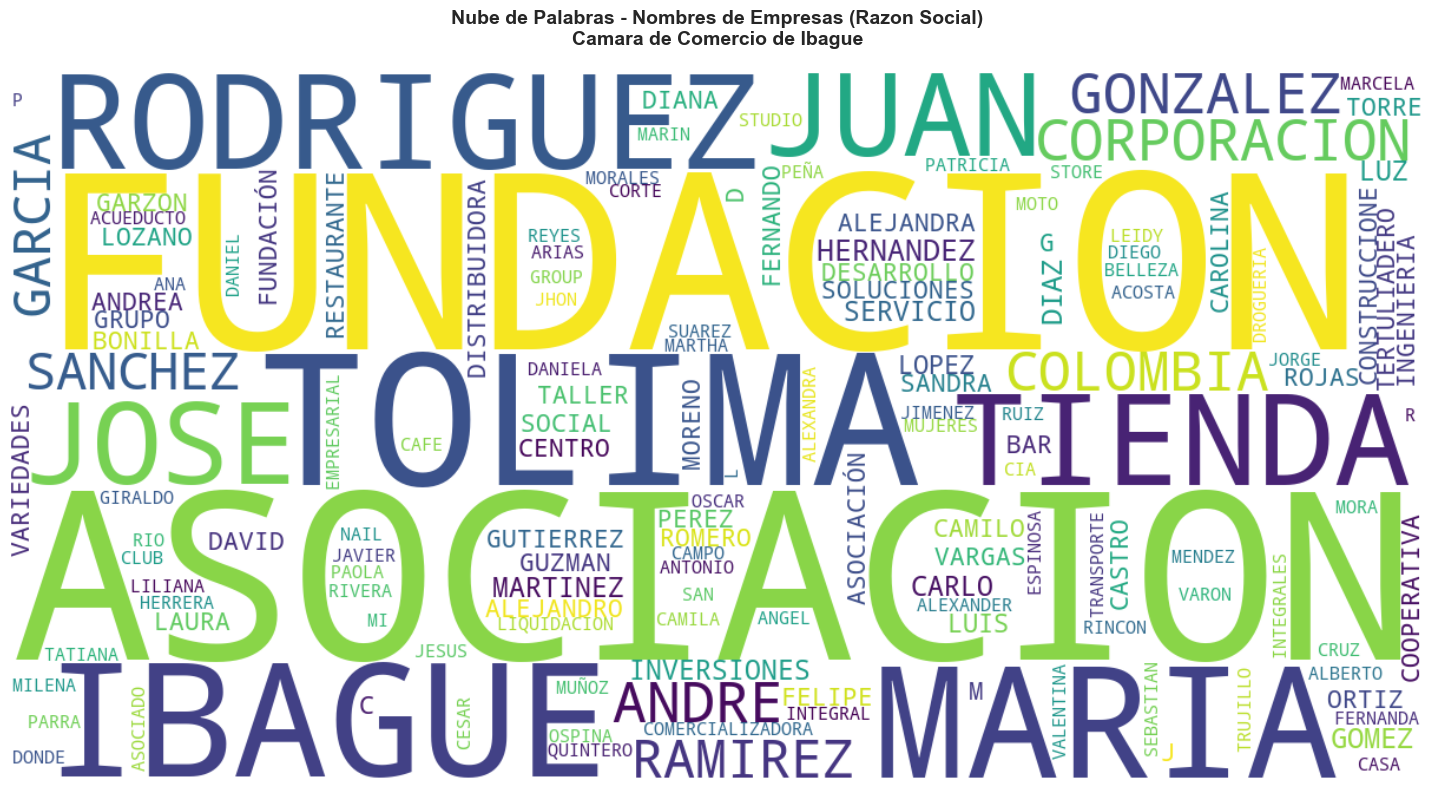

Las palabras mas grandes representan los terminos mas frecuentes en los nombres de las empresas.
Esto permite identificar los sectores y tipos de organizacion predominantes en la region.


In [26]:
# ============================================================
# PASO 7.2: NUBE DE PALABRAS
# ============================================================

if 'RAZON SOCIAL' in df_limpio.columns:
    # Obtener todos los nombres de empresas, eliminando valores nulos
    nombres_empresas = df_limpio['RAZON SOCIAL'].dropna()
    
    # Unir todos los nombres en un solo texto largo separado por espacios
    # Esto es necesario porque WordCloud espera un unico string como entrada
    texto_completo = ' '.join(nombres_empresas)
    
    # Definir palabras a excluir (stopwords)
    # Son palabras comunes que no aportan informacion relevante al analisis
    stopwords_es = {
        'DE', 'LA', 'EL', 'EN', 'LOS', 'LAS', 'DEL', 'Y', 'E', 'A',
        'POR', 'PARA', 'CON', 'SIN', 'SU', 'AL', 'SE', 'NO', 'QUE',
        'UN', 'UNA', 'ES', 'SAS', 'SA', 'LTDA', 'S', 'NRO', 'N',
        'O', 'AS', 'EU', 'CI'
    }
    
    # Crear el objeto WordCloud con configuraciones personalizadas
    # width/height: dimensiones de la imagen en pixeles
    # max_words: maximo de palabras a incluir
    # background_color: color de fondo
    # colormap: paleta de colores para las palabras
    # min_font_size: tamano minimo de fuente
    # stopwords: palabras a excluir
    nube = WordCloud(
        width=1200,
        height=600,
        max_words=150,
        background_color='white',
        colormap='viridis',
        min_font_size=8,
        stopwords=stopwords_es,
        collocations=False  # Evitar repetir combinaciones de palabras
    ).generate(texto_completo)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(16, 8))
    
    # imshow() muestra una imagen (la nube de palabras generada)
    # interpolation='bilinear': suaviza los bordes de las letras
    plt.imshow(nube, interpolation='bilinear')
    
    # Ocultar los ejes X e Y ya que no aportan informacion en una nube de palabras
    plt.axis('off')
    plt.title('Nube de Palabras - Nombres de Empresas (Razon Social)\nCamara de Comercio de Ibague',
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print('Las palabras mas grandes representan los terminos mas frecuentes en los nombres de las empresas.')
    print('Esto permite identificar los sectores y tipos de organizacion predominantes en la region.')

### 7.3 Grafico de Barras: Distribucion por Tipo de Organizacion y Tamano Empresarial

Un **grafico de barras** muestra la frecuencia o conteo de categorias discretas. Es ideal para comparar cantidades entre grupos diferentes.

Se generan dos graficos de barras:
1. **Por tipo de organizacion:** Muestra cuantas empresas son personas naturales, sociedades, ESAL, etc.
2. **Por tamano empresarial:** Muestra la distribucion entre micro, pequenas, medianas y grandes empresas.

Estos graficos permiten comprender la composicion del tejido empresarial de Ibague.

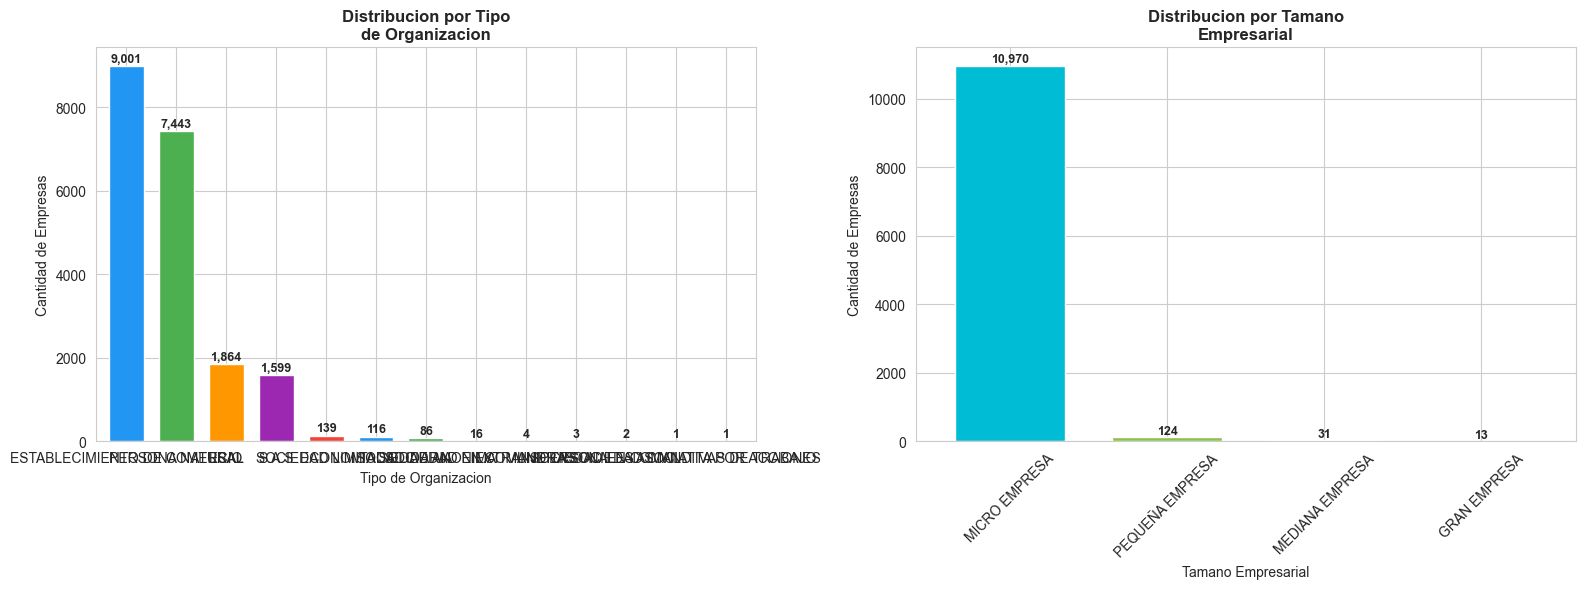


Interpretacion:
- El grafico izquierdo muestra la proporcion de empresas segun su tipo juridico.
- El grafico derecho muestra como se distribuyen las empresas segun su tamano.


In [27]:
# ============================================================
# PASO 7.3: GRAFICOS DE BARRAS
# ============================================================

# Crear una figura con 2 subgraficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Grafico de Barras 1: Tipo de Organizacion ---
if 'ORGANIZACION' in df_limpio.columns:
    # .value_counts(): cuenta cuantas veces aparece cada valor unico
    # Devuelve una serie ordenada de mayor a menor frecuencia
    conteo_org = df_limpio['ORGANIZACION'].value_counts()
    
    # Definir colores personalizados para cada barra
    colores_org = ['#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#F44336']
    
    # .plot(kind='bar'): crea un grafico de barras verticales
    # ax=axes[0]: lo dibuja en el primer subgrafico
    conteo_org.plot(
        kind='bar',
        ax=axes[0],
        color=colores_org[:len(conteo_org)],
        edgecolor='white',
        width=0.7
    )
    axes[0].set_title('Distribucion por Tipo\nde Organizacion', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Tipo de Organizacion', fontsize=10)
    axes[0].set_ylabel('Cantidad de Empresas', fontsize=10)
    axes[0].tick_params(axis='x', rotation=0)
    
    # Agregar etiquetas de valor encima de cada barra
    for i, (valor, nombre) in enumerate(zip(conteo_org.values, conteo_org.index)):
        # .text(): agrega texto en una posicion especifica del grafico
        axes[0].text(i, valor + 100, f'{valor:,}', ha='center', fontweight='bold', fontsize=9)

# --- Grafico de Barras 2: Tamano Empresarial ---
if 'TAMAÑO EMPRESA' in df_limpio.columns:
    conteo_tamano = df_limpio['TAMAÑO EMPRESA'].value_counts()
    
    colores_tam = ['#00BCD4', '#8BC34A', '#FFC107', '#FF5722', '#673AB7']
    
    conteo_tamano.plot(
        kind='bar',
        ax=axes[1],
        color=colores_tam[:len(conteo_tamano)],
        edgecolor='white',
        width=0.7
    )
    axes[1].set_title('Distribucion por Tamano\nEmpresarial', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Tamano Empresarial', fontsize=10)
    axes[1].set_ylabel('Cantidad de Empresas', fontsize=10)
    axes[1].tick_params(axis='x', rotation=45)
    
    # Agregar etiquetas de valor encima de cada barra
    for i, (valor, nombre) in enumerate(zip(conteo_tamano.values, conteo_tamano.index)):
        axes[1].text(i, valor + 100, f'{valor:,}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print('\nInterpretacion:')
print('- El grafico izquierdo muestra la proporcion de empresas segun su tipo juridico.')
print('- El grafico derecho muestra como se distribuyen las empresas segun su tamano.')

---
## Paso 8: Carga de Datos (Load) - Exportacion

La fase final del proceso ETL es la **carga (Load)**, que consiste en almacenar los datos ya limpios y transformados en un formato reutilizable.

Se exporta el DataFrame limpio a un archivo CSV que puede ser utilizado en analisis posteriores, dashboards, o modelos de machine learning sin necesidad de repetir el proceso de limpieza.

In [28]:
# ============================================================
# PASO 8: CARGA DE DATOS (LOAD) - EXPORTACION
# ============================================================

# Definir la ruta de salida para el archivo limpio
ruta_salida = r'data/empresas_ibague_limpio.csv'

# .to_csv(): exporta el DataFrame a un archivo CSV
# index=False: no incluir el indice numerico de pandas como columna en el CSV
# encoding='utf-8-sig': usar UTF-8 con BOM para compatibilidad con Excel en Windows
df_limpio.to_csv(ruta_salida, index=False, encoding='utf-8-sig')

print('=== EXPORTACION COMPLETADA ===')
print(f'Archivo guardado en: {ruta_salida}')
print(f'Filas exportadas: {df_limpio.shape[0]:,}')
print(f'Columnas exportadas: {df_limpio.shape[1]}')

=== EXPORTACION COMPLETADA ===
Archivo guardado en: data/empresas_ibague_limpio.csv
Filas exportadas: 20,280
Columnas exportadas: 62


---
## Paso 9: Resumen y Conclusiones

A continuacion se presenta un resumen de todo el proceso ETL realizado.

In [29]:
# ============================================================
# PASO 9: RESUMEN FINAL
# ============================================================

print('=' * 60)
print('       RESUMEN DEL PROCESO ETL')
print('       Camara de Comercio de Ibague')
print('=' * 60)
print()
print(f'  Dataset original:     {df.shape[0]:,} filas x {df.shape[1]} columnas')
print(f'  Dataset final:        {df_limpio.shape[0]:,} filas x {df_limpio.shape[1]} columnas')
print(f'  Columnas eliminadas:  {df.shape[1] - df_limpio.shape[1] + 3}')  # +3 por las columnas nuevas
print(f'  Columnas agregadas:   3 (NOMBRE_MUNICIPIO, ANTIGUEDAD_ANOS, CIIU_CODIGO)')
print()
print('  Transformaciones realizadas:')
print('    1. Reemplazo de "No reporta" y "No aplica" por NaN')
print('    2. Eliminacion de filas duplicadas')
print('    3. Conversion de columnas de fecha (YYYYMMDD -> datetime)')
print('    4. Conversion de columnas numericas (texto -> numerico)')
print('    5. Estandarizacion de texto (mayusculas, sin espacios extra)')
print('    6. Eliminacion de columnas con >80% de valores nulos')
print('    7. Eliminacion de columnas redundantes por correlacion')
print('    8. Creacion de variables derivadas (municipio, antiguedad, CIIU)')
print()
print('  Visualizaciones generadas:')
print('    - Mapa de calor de correlacion')
print('    - Histogramas de antiguedad, mujeres y socios')
print('    - Nube de palabras de razones sociales')
print('    - Graficos de barras de organizacion y tamano empresarial')
print()
print(f'  Archivo exportado: data/empresas_ibague_limpio.csv')
print()
print('=' * 60)
print('  Autor: Juan Camilo Perea Possos')
print('  Fecha: 20 de Febrero de 2026')
print('=' * 60)

       RESUMEN DEL PROCESO ETL
       Camara de Comercio de Ibague

  Dataset original:     20,280 filas x 85 columnas
  Dataset final:        20,280 filas x 62 columnas
  Columnas eliminadas:  26
  Columnas agregadas:   3 (NOMBRE_MUNICIPIO, ANTIGUEDAD_ANOS, CIIU_CODIGO)

  Transformaciones realizadas:
    1. Reemplazo de "No reporta" y "No aplica" por NaN
    2. Eliminacion de filas duplicadas
    3. Conversion de columnas de fecha (YYYYMMDD -> datetime)
    4. Conversion de columnas numericas (texto -> numerico)
    5. Estandarizacion de texto (mayusculas, sin espacios extra)
    6. Eliminacion de columnas con >80% de valores nulos
    7. Eliminacion de columnas redundantes por correlacion
    8. Creacion de variables derivadas (municipio, antiguedad, CIIU)

  Visualizaciones generadas:
    - Mapa de calor de correlacion
    - Histogramas de antiguedad, mujeres y socios
    - Nube de palabras de razones sociales
    - Graficos de barras de organizacion y tamano empresarial

  Archivo